# Segment 2 Lab 1

Linear regression, generalization and overfitting

## Disclaimer again!

I will go through this quite fast - if you're new to ML, use this to gain intuition!

In [48]:
# imports from incredibly common packages: numpy, matplotlib, sci-kit learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# To set up our problem

## We have 100 Home Appliances.

Each of them have a **price** and a **height**.

Unknown to us - all the home appliances have a price that is (strangely) closely related to its height!

The price is actually closely given by:
$$
price = 200 + 100 \cdot height - 40 \cdot height^2 + 4 \cdot height^3
$$

This means that if we were to create 3 features:
1. height
2. height squared
3. height cubed

Then a linear regression model would be able to predict the price closely.

Let's see how this works.

In [49]:
# Generate synthetic data for Home Appliances: 100 points with prices that roughly follow a cubic curve

np.random.seed(42)
n_samples = 100
heights = np.random.uniform(0, 10, n_samples)
noise = np.random.normal(0, 50, n_samples)
prices = 200 + 100*heights - 40*heights**2 + 4*heights**3 + noise

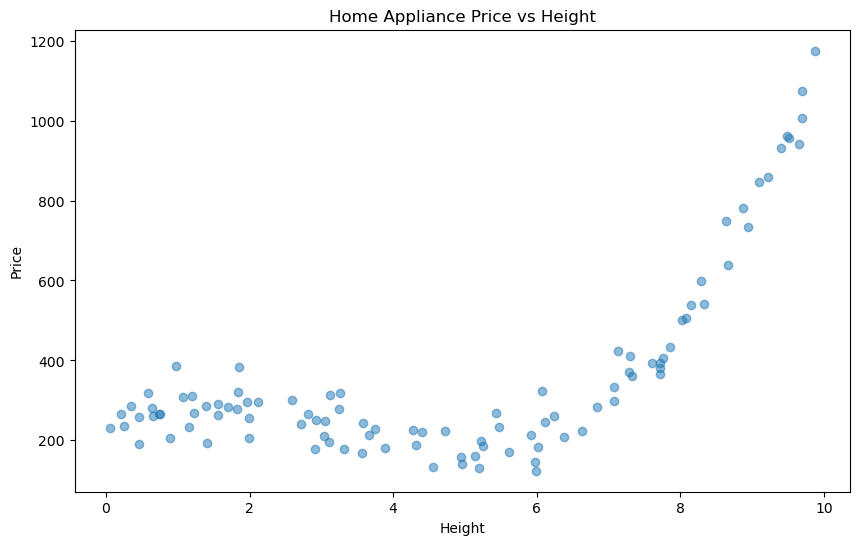

In [50]:
# Plot the generated data

plt.figure(figsize=(10, 6))
plt.scatter(heights, prices, alpha=0.5)
plt.title('Home Appliance Price vs Height')
plt.xlabel('Height')
plt.ylabel('Price')
plt.show()

In [52]:
# Every numpy array has a shape that represents the dimensions of the array
# Our weights are currently a one dimensional list of floats:

print(heights.shape)
print(heights)

(100,)
[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456 9.69584628 7.75132823 9.39498942 8.9482735
 5.97899979 9.21874235 0.88492502 1.95982862 0.45227289 3.25330331
 3.8867729  2.71349032 8.28737509 3.56753327 2.8093451  5.42696083
 1.40924225 8.02196981 0.74550644 9.86886937 7.72244769 1.98715682
 0.05522117 8.15461428 7.06857344 7.29007168 7.71270347 0.74044652
 3.58465729 1.1586906  8.63103426 6.23298127 3.30898025 0.6355835
 3.10982322 3.25183322 7.29606178 6.37557471 8.87212743 4.7

In [53]:
# We want to turn this into a 2D matrix, with a row for each of our 100 datapoints
# And columns for each feature (there is only 1)

X = heights.reshape(-1, 1)
print(X.shape)
print(X)

(100, 1)
[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]
 [1.5599452 ]
 [0.58083612]
 [8.66176146]
 [6.01115012]
 [7.08072578]
 [0.20584494]
 [9.69909852]
 [8.32442641]
 [2.12339111]
 [1.81824967]
 [1.8340451 ]
 [3.04242243]
 [5.24756432]
 [4.31945019]
 [2.9122914 ]
 [6.11852895]
 [1.39493861]
 [2.92144649]
 [3.66361843]
 [4.56069984]
 [7.85175961]
 [1.99673782]
 [5.14234438]
 [5.92414569]
 [0.46450413]
 [6.07544852]
 [1.70524124]
 [0.65051593]
 [9.48885537]
 [9.65632033]
 [8.08397348]
 [3.04613769]
 [0.97672114]
 [6.84233027]
 [4.40152494]
 [1.22038235]
 [4.9517691 ]
 [0.34388521]
 [9.09320402]
 [2.58779982]
 [6.62522284]
 [3.11711076]
 [5.20068021]
 [5.46710279]
 [1.84854456]
 [9.69584628]
 [7.75132823]
 [9.39498942]
 [8.9482735 ]
 [5.97899979]
 [9.21874235]
 [0.88492502]
 [1.95982862]
 [0.45227289]
 [3.25330331]
 [3.8867729 ]
 [2.71349032]
 [8.28737509]
 [3.56753327]
 [2.8093451 ]
 [5.42696083]
 [1.40924225]
 [8.02196981]
 [0.74550644]
 [9.86886937]
 [7.7224476

In [54]:
# We can use this utility method from sk-learn to split up our data into train and test:

X_train, X_test, y_train, y_test = train_test_split(X, prices, test_size=0.2, random_state=42)

In [55]:
# Running Linear Regression is simply a couple of lines of code - predict price based only on height:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Making predictions

Now we have a trained model and we can make predictions. We will run the model on our test dataset.

We'll calculate 2 key metrics: Mean Squared Error and R squared.

**Mean Squared Error** as it sounds, the average of the square of the difference between y and y hat

**R squared** measures how well the predictions fit the truth;  
0 means that the model explains none of the variability and is no better than always guessing the mean value   
100% means it fully explains it  
A negative number suggests that the model is worse than just guessing the average!

In [57]:
# Run predictions on test dataset using model.predict

y_hat_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_hat_test)
r2 = r2_score(y_test, y_hat_test)

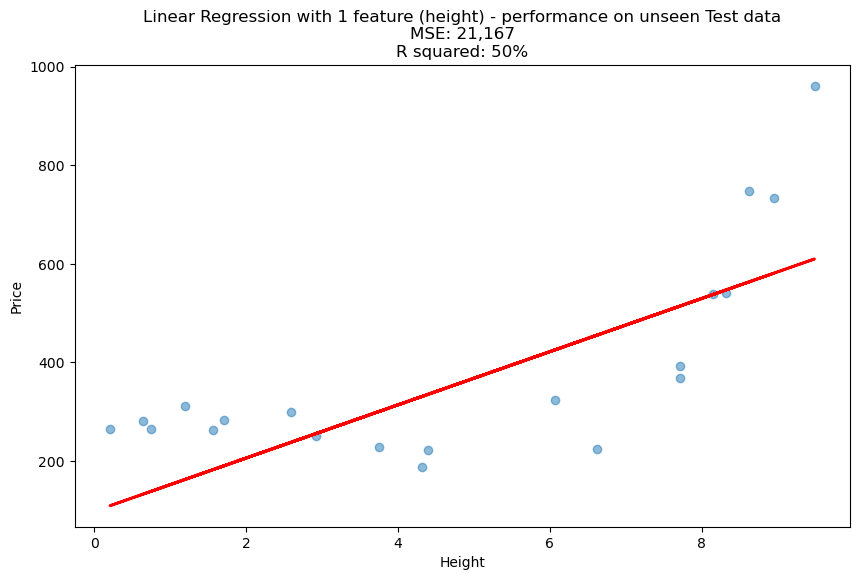

In [58]:
# Let's visualize the results

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, y_hat_test, color='red', linewidth=2)
plt.title(f'Linear Regression with 1 feature (height) - performance on unseen Test data\nMSE: {mse:,.0f}\nR squared: {r2*100:.0f}%')
plt.xlabel('Height')
plt.ylabel('Price')
plt.show()

In [59]:
# Now let's add a SECOND feature to our input data, in addition to the height
# Let's add a feature which is the SQUARE of the height

X2 = np.column_stack((heights, heights**2))
print(X2.shape)
print(X2)

(100, 2)
[[3.74540119e+00 1.40280301e+01]
 [9.50714306e+00 9.03857692e+01]
 [7.31993942e+00 5.35815131e+01]
 [5.98658484e+00 3.58391981e+01]
 [1.56018640e+00 2.43418162e+00]
 [1.55994520e+00 2.43342904e+00]
 [5.80836122e-01 3.37370600e-01]
 [8.66176146e+00 7.50261116e+01]
 [6.01115012e+00 3.61339257e+01]
 [7.08072578e+00 5.01366775e+01]
 [2.05844943e-01 4.23721405e-02]
 [9.69909852e+00 9.40725121e+01]
 [8.32442641e+00 6.92960750e+01]
 [2.12339111e+00 4.50878979e+00]
 [1.81824967e+00 3.30603187e+00]
 [1.83404510e+00 3.36372142e+00]
 [3.04242243e+00 9.25633424e+00]
 [5.24756432e+00 2.75369313e+01]
 [4.31945019e+00 1.86576499e+01]
 [2.91229140e+00 8.48144121e+00]
 [6.11852895e+00 3.74363965e+01]
 [1.39493861e+00 1.94585372e+00]
 [2.92144649e+00 8.53484957e+00]
 [3.66361843e+00 1.34221000e+01]
 [4.56069984e+00 2.07999831e+01]
 [7.85175961e+00 6.16501290e+01]
 [1.99673782e+00 3.98696193e+00]
 [5.14234438e+00 2.64437058e+01]
 [5.92414569e+00 3.50955021e+01]
 [4.64504127e-01 2.15764084e-01]
 

In [60]:
# Split into train and test and run Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X2, prices, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_hat_test)
r2 = r2_score(y_test, y_hat_test)

In [61]:
# Sort X_test for smooth curve plotting

X_test_sorted = X_test[X_test[:, 0].argsort()]
y_hat_test_sorted = model.predict(X_test_sorted)

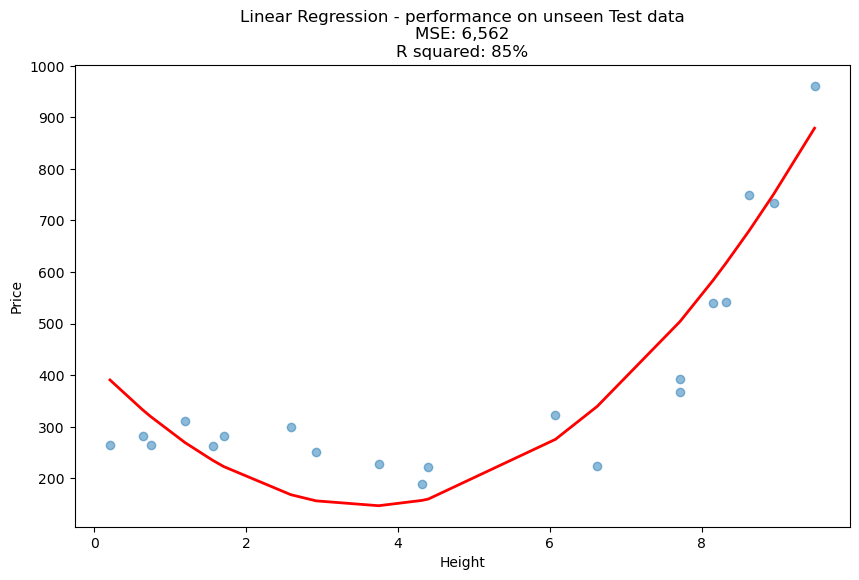

In [62]:
# Plot the results

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, alpha=0.5)
plt.plot(X_test_sorted[:, 0], y_hat_test_sorted, color='red', linewidth=2)
plt.title(f'Linear Regression - performance on unseen Test data\nMSE: {mse:,.0f}\nR squared: {r2*100:.0f}%')
plt.xlabel('Height')
plt.ylabel('Price')
plt.show()

In [63]:
# Step 3: Polynomial Regression (Degree 3)

X3 = np.column_stack((heights, heights**2, heights**3))
X_train, X_test, y_train, y_test = train_test_split(X3, prices, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_hat_test)
r2 = r2_score(y_test, y_hat_test)

In [64]:
# Sort X_test for smooth curve plotting

X_test_sorted = X_test[X_test[:, 0].argsort()]
y_hat_test_sorted = model.predict(X_test_sorted)

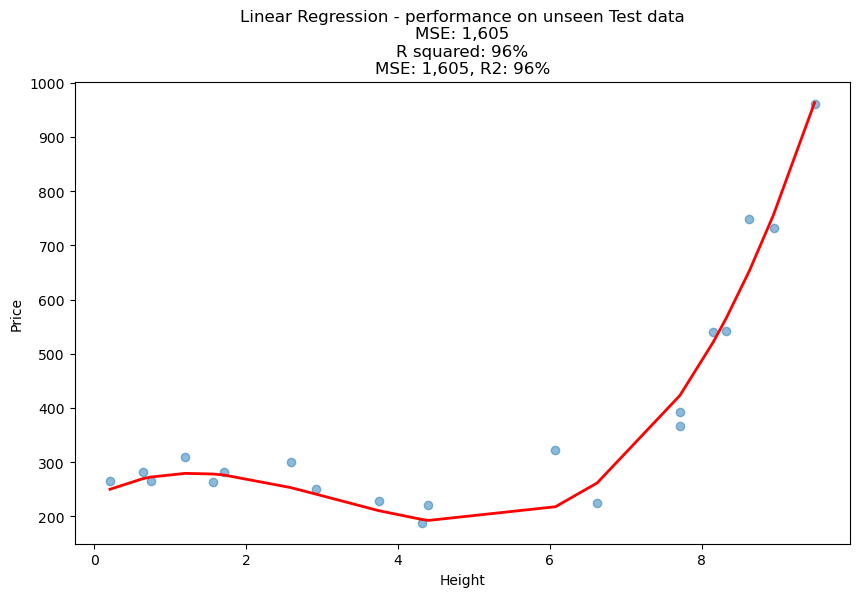

In [65]:
# Visualize the results

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, alpha=0.5)
plt.plot(X_test_sorted[:, 0], y_hat_test_sorted, color='red', linewidth=2)
plt.title(f'Linear Regression - performance on unseen Test data\nMSE: {mse:,.0f}\nR squared: {r2*100:.0f}%\nMSE: {mse:,.0f}, R2: {r2*100:.0f}%')
plt.xlabel('Height')
plt.ylabel('Price')
plt.show()

Remember the true formula is: $price = 200 + 100 \cdot height - 40 \cdot height^2 + 4 \cdot height^3$

In [66]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 236.57548586798026
Coefficients: [ 72.84281062 -35.43966493   3.77646306]


# Conclusion

When we give our Linear Regression model three features:

height  
height squared  
height cubed  

It's able to fit and then it generalizes well, because the results look great on unseen data.

And this makes sense because secretly, we generated data based on exactly those features.

Now let's demonstrate what it looks like to "overfit". What if we came up with a model with THIRTY features...

In [67]:
# Step 4: Overfitting Demonstration!

X_overfit = np.column_stack([heights**i for i in range(1,31)])

print(X_overfit.shape)
print(X_overfit[0])

(100, 30)
[3.74540119e+00 1.40280301e+01 5.25406005e+01 1.96785627e+02
 7.37041123e+02 2.76051470e+03 1.03392350e+04 3.87245832e+04
 1.45039100e+05 5.43229617e+05 2.03461285e+06 7.62044140e+06
 2.85416103e+07 1.06899781e+08 4.00382567e+08 1.49959334e+09
 5.61657868e+09 2.10363405e+10 7.87895346e+10 2.95098417e+11
 1.10526196e+12 4.13964946e+12 1.55046480e+13 5.80711271e+13
 2.17499668e+14 8.14623516e+14 3.05109189e+15 1.14275632e+16
 4.28008087e+16 1.60306200e+17]


In [68]:
# Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X_overfit, prices, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_hat_test)
r2 = r2_score(y_test, y_hat_test)

In [69]:
# Sort X_test for smooth curve plotting

X_test_sorted = X_test[X_test[:, 0].argsort()]
y_hat_test_sorted = model.predict(X_test_sorted)

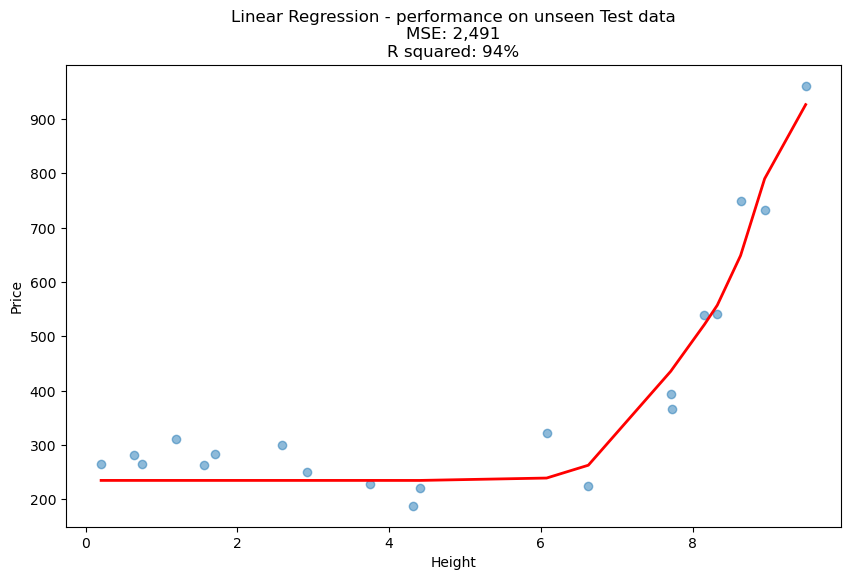

In [70]:
# Plot the results

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, alpha=0.5)
plt.plot(X_test_sorted[:, 0], y_hat_test_sorted, color='red', linewidth=2)
plt.title(f'Linear Regression - performance on unseen Test data\nMSE: {mse:,.0f}\nR squared: {r2*100:.0f}%')
plt.xlabel('Height')
plt.ylabel('Price')
plt.show()

In [71]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 234.95839099624678
Coefficients: [-8.69205286e-19  2.08534807e-18 -8.12683107e-24  4.53437496e-24
  4.16946490e-26 -2.52217763e-27 -1.98257084e-26 -1.19354985e-25
 -7.09670268e-25 -4.15952611e-24 -2.39826279e-23 -1.35661321e-22
 -7.50377695e-22 -4.04186187e-21 -2.10923974e-20 -1.05942808e-19
 -5.07831883e-19 -2.29675085e-18 -9.64601093e-18 -3.67536578e-17
 -1.22473469e-16 -3.34663376e-16 -6.53753184e-16 -5.68496638e-16
  6.41826117e-16 -2.14605624e-16  3.55769373e-17 -3.21543667e-18
  1.52254733e-19 -2.96839719e-21]


# Conclusion

And so you see the surprising results. We provided the Linear Regression with the same festures as before, and MORE features if it wanted them.

And something went wrong: we got worse results.

Why?

Because armed with the extra flexibility, the model was able to fit more closely to the training data.

But it was finding new patterns in the noise that DIDN'T REFLECT the underlying pattern.

So when we extended it to make new predictions, it did worse.

And that is over-fitting!

## Exercise for you

Make it worse! Find ways to overfit even more dramatically.